In [1]:
import sys
from pathlib import Path

# Add src to path
src_path = Path.cwd().parent / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

In [2]:
from pairs_ssm.optimization.table1 import replicate_tableS1
from pairs_ssm.optimization.table1 import simulate_paths_S1, _grid_search_numba_S1_DE
import numpy as np

Modele A1 = MODELE 1
MODELE A2 = MODELE 3 
MODELE A3 = MODELE 5 Avec une specification different (student je pense)

In [3]:
resS1 = replicate_tableS1(N=10000, T=1000, cost_bp=20.0, seed=42, verbose=True)


Replicating Table S1: N=10000, T=1000, cost=20.0bp
Numba available: True

A1
  Paths simulated: N_eff=10000 (C=0.000006, σ=0.016668)
  D: CR: U*=0.6σ, δ*=0.8, CR=0.4269 | SR: U*=1.2σ, δ*=-0.0, SR=0.1009
  E: CR: U*=0.8σ, δ*=1.0, CR=0.4243 | SR: U*=0.5σ, δ*=0.9, SR=0.1392

A2
  Paths simulated: N_eff=10000 (C=0.000439, σ=0.189010)
  D: CR: U*=0.1σ, δ*=0.9, CR=4.0305 | SR: U*=0.2σ, δ*=0.1, SR=0.0771
  E: CR: U*=0.4σ, δ*=1.0, CR=5.5508 | SR: U*=0.2σ, δ*=1.0, SR=0.2519

A3
  Paths simulated: N_eff=10000 (C=0.000321, σ=0.010937)
  D: CR: U*=0.6σ, δ*=0.7, CR=0.5762 | SR: U*=1.1σ, δ*=-0.1, SR=0.1452
  E: CR: U*=1.0σ, δ*=1.0, CR=0.3612 | SR: U*=1.2σ, δ*=0.3, SR=0.1230

✅ Table S1 complete in 93.3s


In [4]:
# =============================================================================
# 3D Surface Plots: CR and SR for Appendix (Strategies D & E, Models A1-A3)
# =============================================================================
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

from pairs_ssm.optimization.table1 import simulate_paths_S1, _grid_search_numba_S1_DE

# Grids (appendix)
U_grid = np.arange(0.1, 2.55, 0.1)          # in sigma units
delta_grid = np.arange(-0.5, 1.01, 0.1)     # delta in [-0.5, 1]
tc = 20 / 10000  # 20bp per trade

# Meshgrid for plotting: X = delta, Y = U
D_mesh, U_mesh = np.meshgrid(delta_grid, U_grid)

# Compute surfaces for all appendix models (use N=2000 for speed)
N_SURF = 2000
surfaces_S1 = {}

print("Computing CR/SR surfaces for Appendix models (A1-A3)...")
for model in ["A1", "A2", "A3"]:
    print(f"  {model}...", end=" ", flush=True)

    paths, C, sigma = simulate_paths_S1(model, N_SURF, 1000, seed=42)

    surfaces_S1[model] = {}
    for strat_name, strat_id in [("D", 4), ("E", 5)]:
        CR_arr, SR_arr = _grid_search_numba_S1_DE(paths, C, sigma, U_grid, delta_grid, strat_id, tc)

        CR_matrix = CR_arr.reshape(len(U_grid), len(delta_grid))
        SR_matrix = SR_arr.reshape(len(U_grid), len(delta_grid))

        # Replace -inf with nan for plotting
        CR_matrix[CR_matrix == -np.inf] = np.nan
        SR_matrix[SR_matrix == -np.inf] = np.nan

        surfaces_S1[model][strat_name] = {"CR": CR_matrix, "SR": SR_matrix}

    print("done")

print("\n✅ All Appendix surfaces computed!")


Computing CR/SR surfaces for Appendix models (A1-A3)...
  A1... done
  A2... done
  A3... done

✅ All Appendix surfaces computed!


In [5]:
def plot_model_surfaces_S1(model_name, surfaces_data):
    """Create 2x2 subplot with CR and SR surfaces for strategies D, E"""
    fig = plt.figure(figsize=(14, 10))

    strategies = ["D", "E"]

    for i, strat in enumerate(strategies):
        # CR surface (left column)
        ax1 = fig.add_subplot(2, 2, 2*i + 1, projection="3d")
        CR = surfaces_data[strat]["CR"]
        ax1.plot_surface(D_mesh, U_mesh, CR, cmap="viridis", edgecolor="none", alpha=0.9)
        ax1.set_xlabel("δ")
        ax1.set_ylabel("Upper Boundary U (σ)")
        ax1.set_zlabel("Return")
        ax1.set_title(f"({chr(97+2*i)}) Return of Strategy {strat}, {model_name}")
        ax1.view_init(elev=25, azim=-60)

        # SR surface (right column)
        ax2 = fig.add_subplot(2, 2, 2*i + 2, projection="3d")
        SR = surfaces_data[strat]["SR"]
        ax2.plot_surface(D_mesh, U_mesh, SR, cmap="viridis", edgecolor="none", alpha=0.9)
        ax2.set_xlabel("δ")
        ax2.set_ylabel("Upper Boundary U (σ)")
        ax2.set_zlabel("Sharpe Ratio")
        ax2.set_title(f"({chr(98+2*i)}) Sharpe Ratio of Strategy {strat}, {model_name}")
        ax2.view_init(elev=25, azim=-60)

    fig.suptitle(f"Performance of Strategy D and E, based on {model_name}",
                 fontsize=14, y=1.01)
    plt.tight_layout()
    return fig


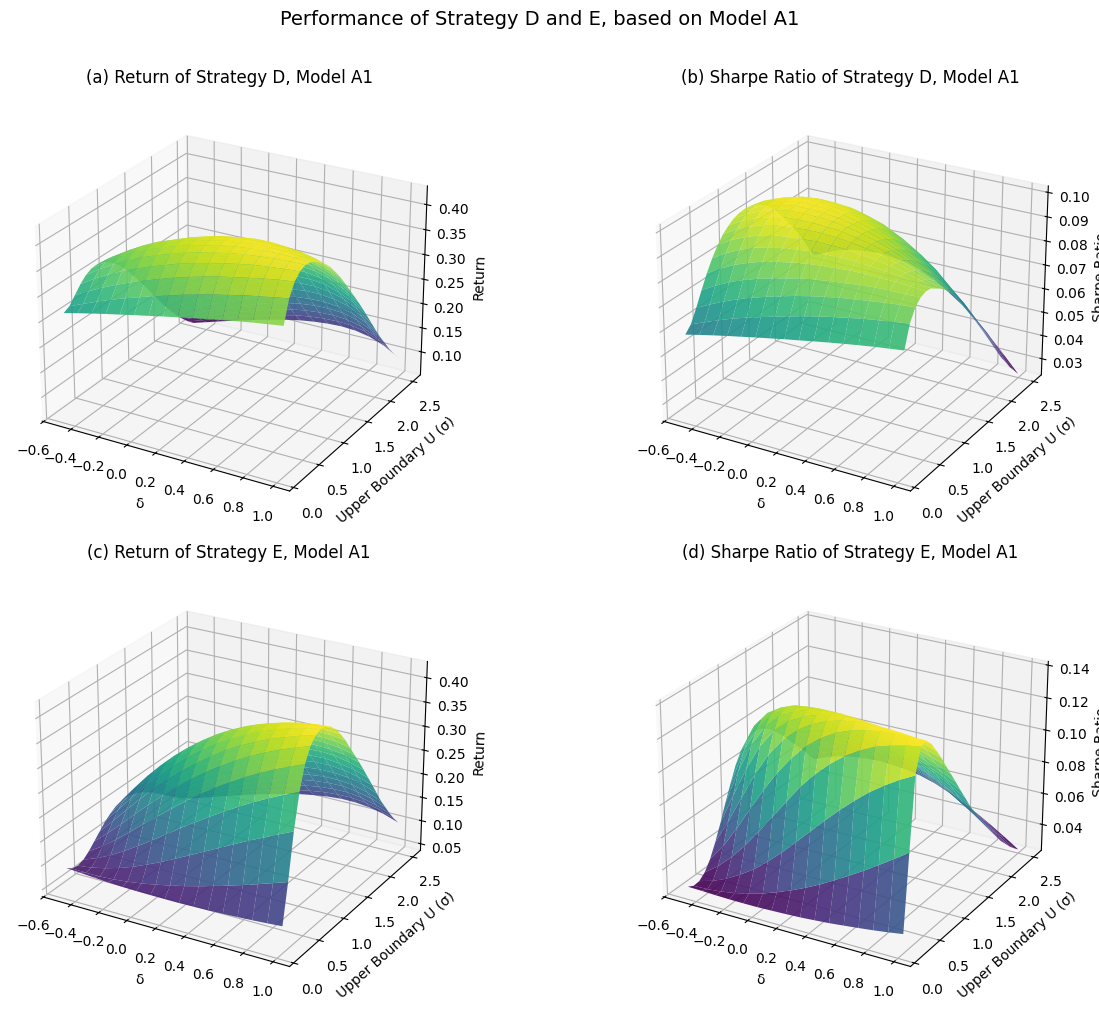

In [6]:
figA1 = plot_model_surfaces_S1("Model A1", surfaces_S1["A1"])
plt.show()




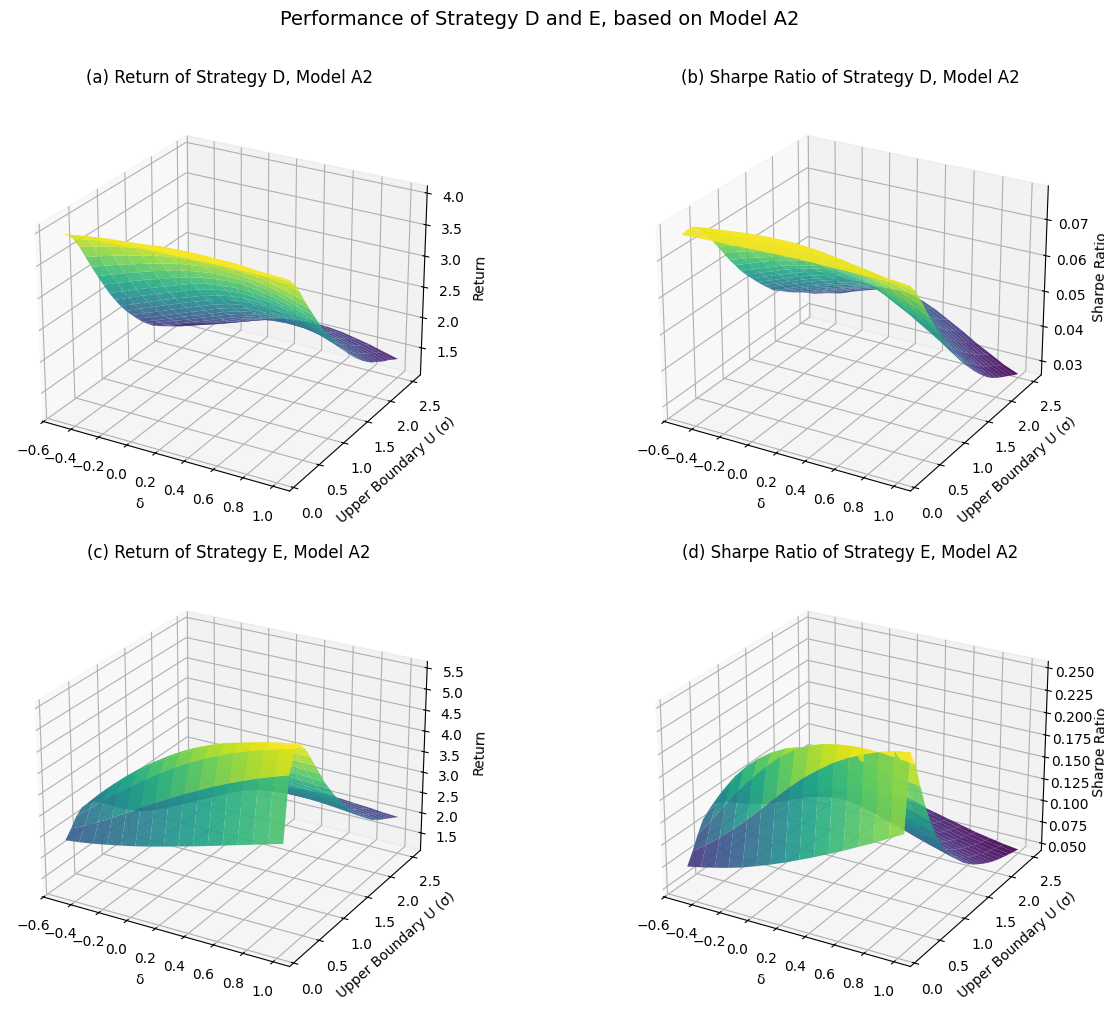

In [7]:
figA2 = plot_model_surfaces_S1("Model A2", surfaces_S1["A2"])
plt.show()



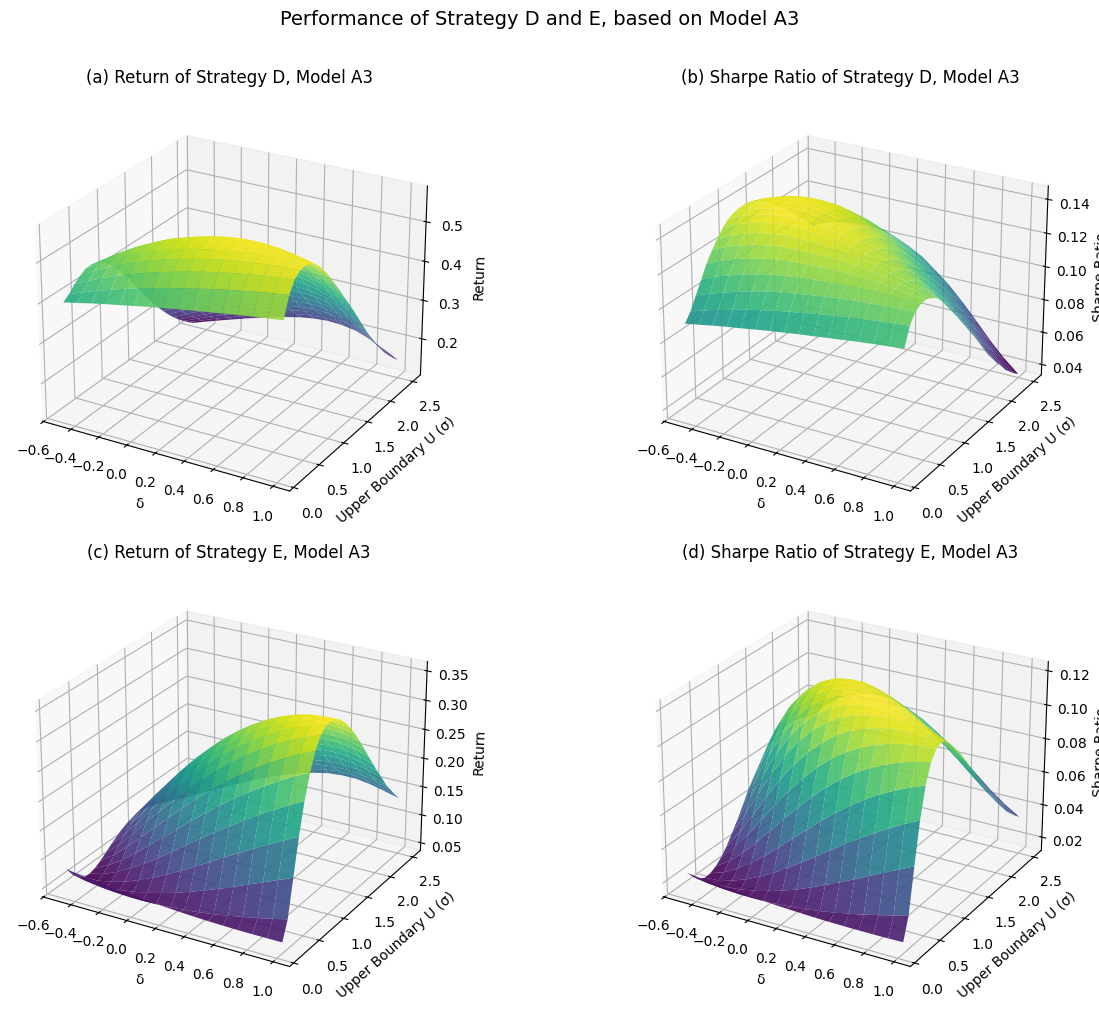


📊 All Appendix model surface plots generated!


In [8]:
figA3 = plot_model_surfaces_S1("Model A3", surfaces_S1["A3"])
plt.show()

print("\n📊 All Appendix model surface plots generated!")